## Advanced Pandas, Basic Python Viz and Exercise

### Exercise
1. Use the same dataframes you generated or copied to this directory from the 03 Exercise:
    1. Extract of any SQL database 
    1. Imported file from your capstone work
    1. Any other data from other exercises you have aleady used
1. Import into Pandas
1. Generate at least three additional dataframes with analytics introduced in this notebook
    1. Melt
    1. Pivot
    1. Quantile
    1. Aggregations
1. Build at least three  visualizations supported by Pandas directly using prior analytics from the 03 Exercise or new analytics from this exercise

In [1]:
#%pip install --upgrade pip
#%pip install openpyxl 
#%pip install pandas
#%pip install matplotlib
#%pip install seaborn
#%pip install numpy
#%pip install sklearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Get the data

### Read a CSV file from a website into a DataFrame

In [3]:
import pandas as pd
url = 'https://data.cdc.gov/api/views/v6ab-adf5/rows.csv?accessType=DOWNLOAD'
mortality_data = pd.read_csv(url)

In [4]:
type(mortality_data)

pandas.core.frame.DataFrame

In [5]:
mortality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        476 non-null    int64  
 1   Age Group   476 non-null    object 
 2   Death Rate  476 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 11.3+ KB


<Axes: xlabel='Year'>

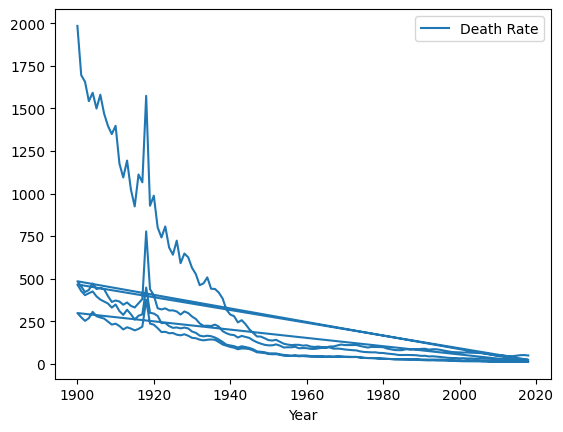

In [6]:
mortality_data.plot.line(x="Year", y = "Death Rate")

In [7]:
mortality_data

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5
...,...,...,...
471,2014,15-19 Years,45.5
472,2015,15-19 Years,48.3
473,2016,15-19 Years,51.2
474,2017,15-19 Years,51.5


In [8]:
# SELECT [Age Group] , Year, COUNT(*) GROUP BY [Age Group], Year
mortality_data[['Age Group','Year']].value_counts()

Age Group    Year
1-4 Years    1900    1
15-19 Years  1975    1
             1987    1
             1986    1
             1985    1
                    ..
10-14 Years  1935    1
             1934    1
             1933    1
             1932    1
5-9 Years    2018    1
Name: count, Length: 476, dtype: int64

### Save and restore a DataFrame

In [9]:
mortality_data.to_pickle('mortality_data.pkl')

In [10]:
mortality_data = pd.read_pickle('mortality_data.pkl')

In [11]:
mortality_data.head()

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5


## Examine and clean the data

In [12]:
print("Index:  ", mortality_data.index)
print("Columns:", mortality_data.columns)
print("Size:   ", mortality_data.size)
print("Shape:  ", mortality_data.shape)

Index:   RangeIndex(start=0, stop=476, step=1)
Columns: Index(['Year', 'Age Group', 'Death Rate'], dtype='object')
Size:    1428
Shape:   (476, 3)


### Use the columns attribute to replace spaces with nothing


In [13]:
mortality_data.columns = mortality_data.columns.str.replace(' ', '')
mortality_data.columns

Index(['Year', 'AgeGroup', 'DeathRate'], dtype='object')

In [14]:
mortality_data.head()

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5


In [15]:
mortality_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,476.0,1959.00000,34.387268,1900.0,1929.000,1959.0,1989.000,2018.0
DeathRate,476.0,192.92416,293.224216,11.4,40.575,89.5,222.575,1983.8


In [16]:
mortality_data.describe(include="O").T

,count,unique,top,freq
AgeGroup,476,4,1-4 Years,119


In [17]:
len(mortality_data.DeathRate.value_counts())

430

<Axes: >

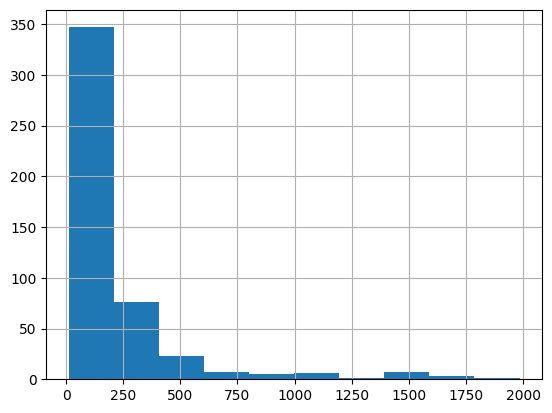

In [18]:
mortality_data.DeathRate.hist()

In [19]:
import numpy as np
mortality_data['death_log']= np.log10(mortality_data['DeathRate'])

<Axes: >

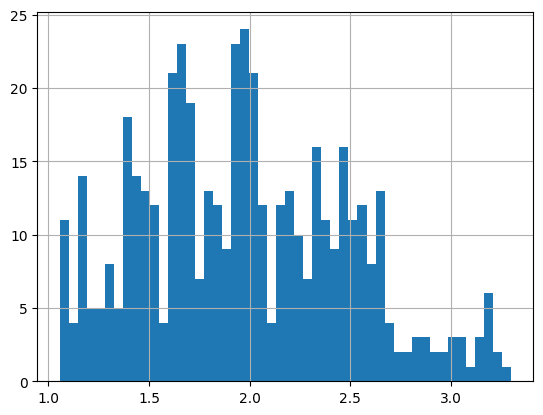

In [20]:
mortality_data.death_log.hist(bins=50)

<Axes: >

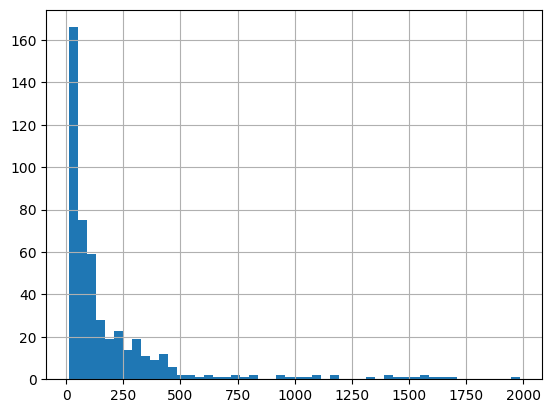

In [21]:
mortality_data.DeathRate.hist(bins=50)

In [22]:
mortality_data.describe(include='O')

,AgeGroup
count,476
unique,4
top,1-4 Years
freq,119


In [23]:
mortality_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,476.0,1959.00000,34.387268,1900.000000,1929.000000,1959.000000,1989.000000,2018.000000
DeathRate,476.0,192.92416,293.224216,11.400000,40.575000,89.500000,222.575000,1983.800000
death_log,476.0,1.97402,0.507702,1.056905,1.608258,1.951823,2.347475,3.297498


## Access the data

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'DeathRate'}>],
       [<Axes: title={'center': 'death_log'}>, <Axes: >]], dtype=object)

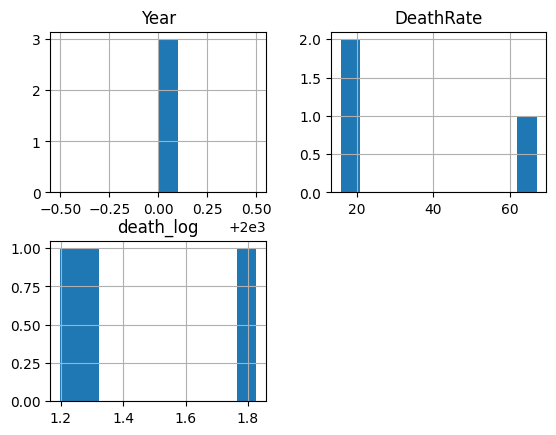

In [24]:
mortality_data.query("Year == 2000 and AgeGroup != '1-4 Years'").hist()

In [25]:
mortality_data.query('Year == 1900 or Year == 2000').head()

,Year,AgeGroup,DeathRate,death_log
0,1900,1-4 Years,1983.8,3.297498
100,2000,1-4 Years,32.4,1.510545
119,1900,5-9 Years,466.1,2.668479
219,2000,5-9 Years,15.8,1.198657
238,1900,10-14 Years,298.3,2.474653


In [26]:
# use backticks if a column name contains spaces
mortality_data.query('Year == 2000 and `AgeGroup` != "1-4 Years"')

,Year,AgeGroup,DeathRate,death_log
219,2000,5-9 Years,15.8,1.198657
338,2000,10-14 Years,20.3,1.307496
457,2000,15-19 Years,67.1,1.826723


### Access a subset of rows and columns

In [27]:
mortality_data.query('Year == 1900').DeathRate.head()

0      1983.8
119     466.1
238     298.3
357     484.8
Name: DeathRate, dtype: float64

In [28]:
mortality_data.query('Year == 1900')['DeathRate'].head()

0      1983.8
119     466.1
238     298.3
357     484.8
Name: DeathRate, dtype: float64

In [29]:
mortality_data.query('Year == 1900')[['AgeGroup','DeathRate']].head()

,AgeGroup,DeathRate
0,1-4 Years,1983.8
119,5-9 Years,466.1
238,10-14 Years,298.3
357,15-19 Years,484.8


### Apply statistical methods

In [30]:
#mean = sum of values / count of case/observation
md_mu = mortality_data["DeathRate"].mean()

In [31]:
md_sigma = mortality_data["DeathRate"].std()

In [32]:
#95% confidence interval is mean +/- 2 stdev
print ("deathrate is {} +/- {}".format(md_mu,2*md_sigma))

deathrate is 192.92415966386554 +/- 586.4484319208575


In [33]:
mortality_data['outlier'] = mortality_data['DeathRate'].apply(
        lambda x: 
        True 
        if ( x > md_mu + 2*md_sigma or x < md_mu - 2*md_sigma)  
        else False 
            )


In [34]:
mortality_data.outlier.value_counts()

outlier
False    453
True      23
Name: count, dtype: int64

In [35]:
# line you draw for equal number of cases on either side
mortality_data.DeathRate.median()

89.5

In [36]:
mortality_data[['AgeGroup','DeathRate']].max()

AgeGroup     5-9 Years
DeathRate       1983.8
dtype: object

In [37]:
mortality_data.count()

Year         476
AgeGroup     476
DeathRate    476
death_log    476
outlier      476
dtype: int64

In [38]:
[i/20 for i in range(0,20)]

[0.0,
 0.05,
 0.1,
 0.15,
 0.2,
 0.25,
 0.3,
 0.35,
 0.4,
 0.45,
 0.5,
 0.55,
 0.6,
 0.65,
 0.7,
 0.75,
 0.8,
 0.85,
 0.9,
 0.95]

In [39]:
mortality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       476 non-null    int64  
 1   AgeGroup   476 non-null    object 
 2   DeathRate  476 non-null    float64
 3   death_log  476 non-null    float64
 4   outlier    476 non-null    bool   
dtypes: bool(1), float64(2), int64(1), object(1)
memory usage: 15.5+ KB


In [41]:

mortality_data[['Year','DeathRate','death_log']].quantile(0.5)

Year         1959.000000
DeathRate      89.500000
death_log       1.951823
Name: 0.5, dtype: float64

In [42]:
len(mortality_data)

476

In [43]:
mort_dist = mortality_data[['Year','DeathRate','death_log']].quantile([i/20 for i in range(0,20)])
mort_dist

,Year,DeathRate,death_log
0.00,1900.00,11.400,1.056905
0.05,1905.75,15.050,1.177529
0.10,1911.50,21.500,1.332438
0.15,1917.25,26.350,1.420778
0.20,1923.00,31.800,1.502427
0.25,1929.00,40.575,1.608258
0.30,1935.00,45.050,1.653688
0.35,1941.00,51.275,1.709904
0.40,1947.00,63.800,1.804821
0.45,1953.00,80.050,1.903349


In [44]:
mort_dist.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 0.0 to 0.95
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       20 non-null     float64
 1   DeathRate  20 non-null     float64
 2   death_log  20 non-null     float64
dtypes: float64(3)
memory usage: 640.0 bytes


In [45]:
#bins of 20 percentile cuts

mort_dist["quantile"] = mort_dist.index
mort_dist


,Year,DeathRate,death_log,quantile
0.00,1900.00,11.400,1.056905,0.00
0.05,1905.75,15.050,1.177529,0.05
0.10,1911.50,21.500,1.332438,0.10
0.15,1917.25,26.350,1.420778,0.15
0.20,1923.00,31.800,1.502427,0.20
0.25,1929.00,40.575,1.608258,0.25
0.30,1935.00,45.050,1.653688,0.30
0.35,1941.00,51.275,1.709904,0.35
0.40,1947.00,63.800,1.804821,0.40
0.45,1953.00,80.050,1.903349,0.45


<Axes: xlabel='DeathRate'>

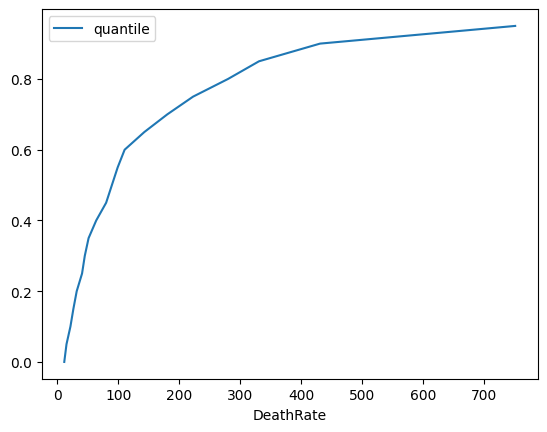

In [46]:
mort_dist.plot.line(y="quantile", x = "DeathRate")

<Axes: xlabel='death_log'>

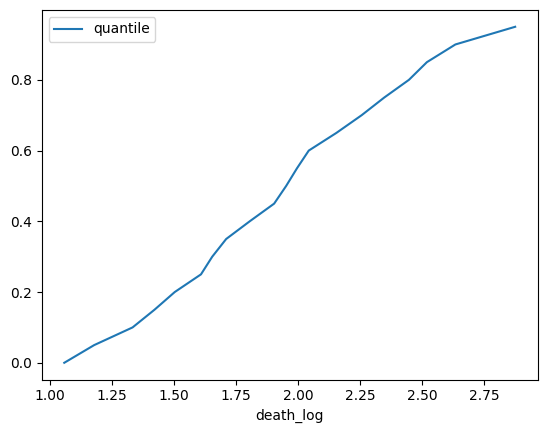

In [47]:
mort_dist.plot.line(y="quantile", x = "death_log")

In [48]:
# compare with SUM() OVER in SQL
mortality_data["CumDeathRate"] = mortality_data.DeathRate.cumsum()
mortality_data

,Year,AgeGroup,DeathRate,death_log,outlier,CumDeathRate
0,1900,1-4 Years,1983.8,3.297498,True,1983.8
1,1901,1-4 Years,1695.0,3.229170,True,3678.8
2,1902,1-4 Years,1655.7,3.218982,True,5334.5
3,1903,1-4 Years,1542.1,3.188113,True,6876.6
4,1904,1-4 Years,1591.5,3.201807,True,8468.1
...,...,...,...,...,...,...
471,2014,15-19 Years,45.5,1.658011,False,91631.7
472,2015,15-19 Years,48.3,1.683947,False,91680.0
473,2016,15-19 Years,51.2,1.709270,False,91731.2
474,2017,15-19 Years,51.5,1.711807,False,91782.7


<Axes: >

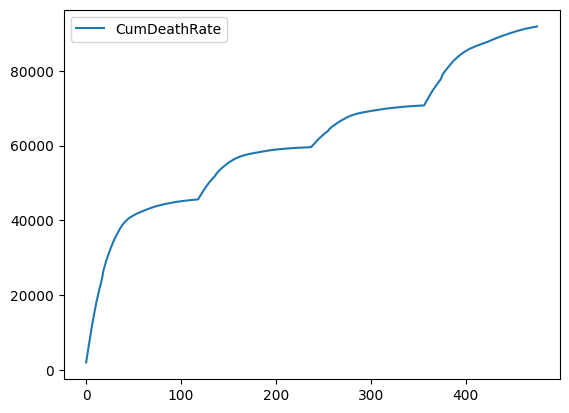

In [51]:
mortality_data.plot.line( y = "CumDeathRate")

### Use Python for column arithmetic

In [52]:
mortality_data['MeanCentered'] = \
    mortality_data.DeathRate - mortality_data.DeathRate.mean()

In [53]:
#mortality_data.head(4)
mortality_data.MeanCentered.describe()

count    4.760000e+02
mean     3.821406e-15
std      2.932242e+02
min     -1.815242e+02
25%     -1.523492e+02
50%     -1.034242e+02
75%      2.965084e+01
max      1.790876e+03
Name: MeanCentered, dtype: float64

In [54]:
mortality_data['DeathRate'] = mortality_data.DeathRate / 100000

In [55]:
mortality_data.head(4)

,Year,AgeGroup,DeathRate,death_log,outlier,CumDeathRate,MeanCentered
0,1900,1-4 Years,0.019838,3.297498,True,1983.8,1790.87584
1,1901,1-4 Years,0.016950,3.229170,True,3678.8,1502.07584
2,1902,1-4 Years,0.016557,3.218982,True,5334.5,1462.77584
3,1903,1-4 Years,0.015421,3.188113,True,6876.6,1349.17584


## Shape the data

### Set and use an index

In [56]:
mortality_data = mortality_data.set_index('Year')
mortality_data.head(2)

,AgeGroup,DeathRate,death_log,outlier,CumDeathRate,MeanCentered
Year,,,,,,
1900,1-4 Years,0.019838,3.297498,True,1983.8,1790.87584
1901,1-4 Years,0.016950,3.229170,True,3678.8,1502.07584


In [57]:
len(mortality_data)

476

In [58]:
mortality_data.reset_index(inplace=True)
mortality_data

,Year,AgeGroup,DeathRate,death_log,outlier,CumDeathRate,MeanCentered
0,1900,1-4 Years,0.019838,3.297498,True,1983.8,1790.87584
1,1901,1-4 Years,0.016950,3.229170,True,3678.8,1502.07584
2,1902,1-4 Years,0.016557,3.218982,True,5334.5,1462.77584
3,1903,1-4 Years,0.015421,3.188113,True,6876.6,1349.17584
4,1904,1-4 Years,0.015915,3.201807,True,8468.1,1398.57584
...,...,...,...,...,...,...,...
471,2014,15-19 Years,0.000455,1.658011,False,91631.7,-147.42416
472,2015,15-19 Years,0.000483,1.683947,False,91680.0,-144.62416
473,2016,15-19 Years,0.000512,1.709270,False,91731.2,-141.72416
474,2017,15-19 Years,0.000515,1.711807,False,91782.7,-141.42416


In [ ]:
# NOTE: the following line of code causes ValueError: Index has duplicate keys
mortality_data = mortality_data.set_index('Year', verify_integrity=True)
#mortality_data

In [59]:
mortality_data = mortality_data.set_index(
    ['Year','AgeGroup'], verify_integrity=True)
mortality_data.head(2)

,,DeathRate,death_log,outlier,CumDeathRate,MeanCentered
Year,AgeGroup,,,,,
1900,1-4 Years,0.019838,3.297498,True,1983.8,1790.87584
1901,1-4 Years,0.016950,3.229170,True,3678.8,1502.07584


In [60]:
mortality_data.reset_index(inplace=True)
mortality_data.head(2)

,Year,AgeGroup,DeathRate,death_log,outlier,CumDeathRate,MeanCentered
0,1900,1-4 Years,0.019838,3.297498,True,1983.8,1790.87584
1,1901,1-4 Years,0.016950,3.229170,True,3678.8,1502.07584


In [61]:
mortality_data.shape

(476, 7)

### Pivot the data

In [62]:
mortality_wide = mortality_data.pivot(
    index='Year', columns='AgeGroup', values=['DeathRate','MeanCentered'])
mortality_wide.head(3)

DeathRate                                   MeanCentered               
AgeGroup 1-4 Years 10-14 Years 15-19 Years 5-9 Years    1-4 Years 10-14 Years   
Year                                                                            
1900      0.019838    0.002983    0.004848  0.004661   1790.87584   105.37584  \
1901      0.016950    0.002736    0.004544  0.004276   1502.07584    80.67584   
1902      0.016557    0.002525    0.004215  0.004033   1462.77584    59.57584   

                                 
AgeGroup 15-19 Years  5-9 Years  
Year                             
1900       291.87584  273.17584  
1901       261.47584  234.67584  
1902       228.57584  210.37584

In [63]:
mortality_wide.shape

(119, 8)

In [64]:
mortality_wide = mortality_data.pivot(
    index=['Year','MeanCentered'], columns='AgeGroup', values='DeathRate')
mortality_wide.head(3)    

AgeGroup           1-4 Years  10-14 Years  15-19 Years  5-9 Years
Year MeanCentered                                                
1900 105.37584           NaN     0.002983          NaN        NaN
     273.17584           NaN          NaN          NaN   0.004661
     291.87584           NaN          NaN     0.004848        NaN

In [65]:
mortality_wide = mortality_data.pivot(
    index='Year', columns='AgeGroup')
mortality_wide.head(3)

DeathRate                                   death_log               
AgeGroup 1-4 Years 10-14 Years 15-19 Years 5-9 Years 1-4 Years 10-14 Years   
Year                                                                         
1900      0.019838    0.002983    0.004848  0.004661  3.297498    2.474653  \
1901      0.016950    0.002736    0.004544  0.004276  3.229170    2.437116   
1902      0.016557    0.002525    0.004215  0.004033  3.218982    2.402261   

                                 outlier                                     
AgeGroup 15-19 Years 5-9 Years 1-4 Years 10-14 Years 15-19 Years 5-9 Years   
Year                                                                         
1900        2.685563  2.668479      True       False       False     False  \
1901        2.657438  2.631038      True       False       False     False   
1902        2.624798  2.605628      True       False       False     False   

         CumDeathRate                                   MeanCentered   
AgeGroup    1-4 Years 10-14 Years 15-19 Years 5-9 Years    1-4 Years   
Year                                                                   
1900           1983.8     59864.0     71209.1   46070.0   1790.87584  \
1901           3678.8     60137.6     71663.5   46497.6   1502.07584   
1902           5334.5     60390.1     72085.0   46900.9   1462.77584   

                                             
AgeGroup 10-14 Years 15-19 Years  5-9 Years  
Year                                         
1900       105.37584   291.87584  273.17584  
1901        80.67584   261.47584  234.67584  
1902        59.57584   228.57584  210.37584

In [66]:
mortality_wide.to_csv("mortality_wide.csv")

In [67]:
mortality_wide.shape

(119, 20)

### Melt the data

In [68]:
mortality_wide = mortality_data.pivot(
    index='Year', columns='AgeGroup', values='DeathRate')
mortality_wide.head(3)

AgeGroup,1-4 Years,10-14 Years,15-19 Years,5-9 Years
Year,,,,
1900,0.019838,0.002983,0.004848,0.004661
1901,0.016950,0.002736,0.004544,0.004276
1902,0.016557,0.002525,0.004215,0.004033


In [69]:
# get starting data


# save to Excel format to remove indexes
mortality_wide.to_excel('mortality_wide.xlsx')
mortality_wide = pd.read_excel('mortality_wide.xlsx')

mortality_wide.head(4)

,Year,1-4 Years,10-14 Years,15-19 Years,5-9 Years
0,1900,0.019838,0.002983,0.004848,0.004661
1,1901,0.016950,0.002736,0.004544,0.004276
2,1902,0.016557,0.002525,0.004215,0.004033
3,1903,0.015421,0.002682,0.004341,0.004147


In [70]:
mortality_long = mortality_wide.melt(
    id_vars = 'Year',
    value_vars=['1-4 Years','5-9 Years'],
    var_name ='AgeGroup',
    value_name='DeathRate')

with pd.option_context('display.max_rows', 4):
    display(mortality_long)

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,0.019838
1,1901,1-4 Years,0.016950
...,...,...,...
236,2017,5-9 Years,0.000116
237,2018,5-9 Years,0.000115


## Analyze the data

### Group the data

In [71]:
mortality_data.groupby('AgeGroup').mean()

,Year,DeathRate,death_log,outlier,CumDeathRate,MeanCentered
AgeGroup,,,,,,
1-4 Years,1959.0,0.003832,2.193591,0.193277,37353.117647,190.301891
10-14 Years,1959.0,0.000938,1.772540,0.000000,67911.569748,-99.154412
15-19 Years,1959.0,0.001774,2.134860,0.000000,85460.104202,-15.549370
5-9 Years,1959.0,0.001173,1.795091,0.000000,56497.440336,-75.598109


In [72]:
mortality_data.groupby('AgeGroup').median()

,Year,DeathRate,death_log,outlier,CumDeathRate,MeanCentered
AgeGroup,,,,,,
1-4 Years,1959.0,0.001091,2.037825,0.0,42409.4,-83.82416
10-14 Years,1959.0,0.000446,1.649335,0.0,69110.8,-148.32416
15-19 Years,1959.0,0.001069,2.028978,0.0,87096.4,-86.02416
5-9 Years,1959.0,0.000484,1.684845,0.0,58040.5,-144.52416


In [74]:
mortality_data.groupby(['Year',"AgeGroup"]).median().head(4)

DeathRate  death_log  outlier  CumDeathRate  MeanCentered
Year AgeGroup                                                              
1900 1-4 Years     0.019838   3.297498      1.0        1983.8    1790.87584
     10-14 Years   0.002983   2.474653      0.0       59864.0     105.37584
     15-19 Years   0.004848   2.685563      0.0       71209.1     291.87584
     5-9 Years     0.004661   2.668479      0.0       46070.0     273.17584

In [75]:
mortality_data.groupby(['Year','AgeGroup']).count().head()

DeathRate  death_log  outlier  CumDeathRate  MeanCentered
Year AgeGroup                                                              
1900 1-4 Years            1          1        1             1             1
     10-14 Years          1          1        1             1             1
     15-19 Years          1          1        1             1             1
     5-9 Years            1          1        1             1             1
1901 1-4 Years            1          1        1             1             1

### Aggregate the data

In [76]:
mortality_data[['AgeGroup','DeathRate']].groupby('AgeGroup').agg(['mean','median','min','max','std'])

DeathRate                                        
                 mean    median       min       max       std
AgeGroup                                                     
1-4 Years    0.003832  0.001091  0.000240  0.019838  0.005005
10-14 Years  0.000938  0.000446  0.000139  0.003751  0.000884
15-19 Years  0.001774  0.001069  0.000448  0.007774  0.001384
5-9 Years    0.001173  0.000484  0.000114  0.004661  0.001275

In [77]:
mortality_data[['AgeGroup','DeathRate']].groupby('AgeGroup')?

SyntaxError: invalid syntax (1320824208.py, line 1)

In [78]:
AgeGS = mortality_data.groupby("AgeGroup")
type(AgeGS)

pandas.core.groupby.generic.DataFrameGroupBy

In [79]:
AgeGS["outlier"].agg(['mean','median','std','nunique'])

,mean,median,std,nunique
AgeGroup,,,,
1-4 Years,0.193277,0.0,0.396538,2
10-14 Years,0.000000,0.0,0.000000,1
15-19 Years,0.000000,0.0,0.000000,1
5-9 Years,0.000000,0.0,0.000000,1


In [80]:
mortality_data.groupby('AgeGroup')['DeathRate'] \
    .agg(['mean','median','std','nunique'])

,mean,median,std,nunique
AgeGroup,,,,
1-4 Years,0.003832,0.001091,0.005005,117
10-14 Years,0.000938,0.000446,0.000884,115
15-19 Years,0.001774,0.001069,0.001384,117
5-9 Years,0.001173,0.000484,0.001275,115


In [81]:
mortality_data.groupby('Year')['DeathRate'] \
    .agg(['mean','median','std','min','max','var','nunique']).head(3)

,mean,median,std,min,max,var,nunique
Year,,,,,,,
1900,0.008082,0.004755,0.007882,0.002983,0.019838,0.000062,4
1901,0.007127,0.004410,0.006597,0.002736,0.016950,0.000044,4
1902,0.006833,0.004124,0.006527,0.002525,0.016557,0.000043,4


In [82]:
def fun_1q(foo): return foo.quantile(0.75)

fun_1q(mortality_data.DeathRate)

0.0022257500000000003

In [83]:
fun_1q(mortality_wide[['1-4 Years']])

1-4 Years    0.005773
Name: 0.75, dtype: float64

## Visualize the data

In [84]:
mortality_data.pivot(index='Year',columns='AgeGroup')['DeathRate']

AgeGroup,1-4 Years,10-14 Years,15-19 Years,5-9 Years
Year,,,,
1900,0.019838,0.002983,0.004848,0.004661
1901,0.016950,0.002736,0.004544,0.004276
1902,0.016557,0.002525,0.004215,0.004033
1903,0.015421,0.002682,0.004341,0.004147
1904,0.015915,0.003052,0.004714,0.004250
...,...,...,...,...
2014,0.000240,0.000140,0.000455,0.000115
2015,0.000249,0.000146,0.000483,0.000117
2016,0.000253,0.000146,0.000512,0.000122


<Axes: xlabel='typing.Literal[<no_default>]'>

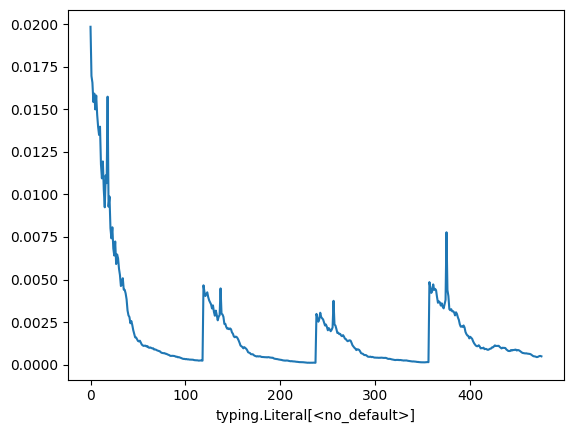

In [85]:
mortality_data['DeathRate'].plot()

In [86]:
mortality_data.pivot(index='Year',columns='AgeGroup')['DeathRate']

AgeGroup,1-4 Years,10-14 Years,15-19 Years,5-9 Years
Year,,,,
1900,0.019838,0.002983,0.004848,0.004661
1901,0.016950,0.002736,0.004544,0.004276
1902,0.016557,0.002525,0.004215,0.004033
1903,0.015421,0.002682,0.004341,0.004147
1904,0.015915,0.003052,0.004714,0.004250
...,...,...,...,...
2014,0.000240,0.000140,0.000455,0.000115
2015,0.000249,0.000146,0.000483,0.000117
2016,0.000253,0.000146,0.000512,0.000122


<Axes: xlabel='Year'>

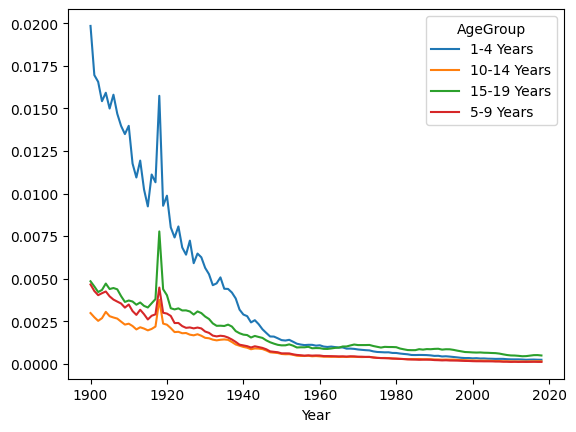

In [87]:
mortality_data.pivot(index='Year',columns='AgeGroup')['DeathRate'].plot()

In [88]:
mortality_data.groupby('AgeGroup')['DeathRate'] \
    .agg(['mean','median','std'])


,mean,median,std
AgeGroup,,,
1-4 Years,0.003832,0.001091,0.005005
10-14 Years,0.000938,0.000446,0.000884
15-19 Years,0.001774,0.001069,0.001384
5-9 Years,0.001173,0.000484,0.001275


In [ ]:
mortality_data.plot.

<Axes: ylabel='AgeGroup'>

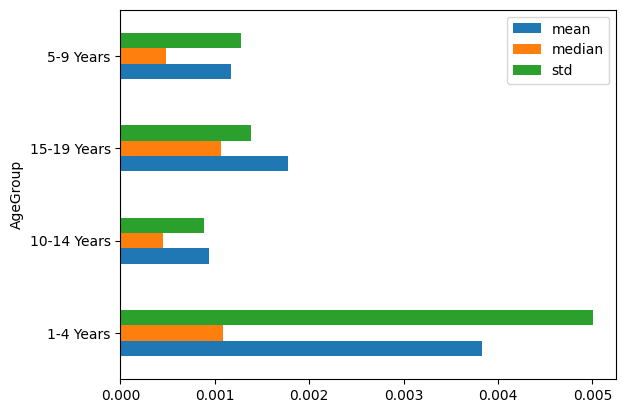

In [89]:
mortality_data.groupby('AgeGroup')['DeathRate'] \
    .agg(['mean','median','std']).plot.barh()

In [90]:
import seaborn as sns

<Axes: xlabel='AgeGroup', ylabel='DeathRate'>

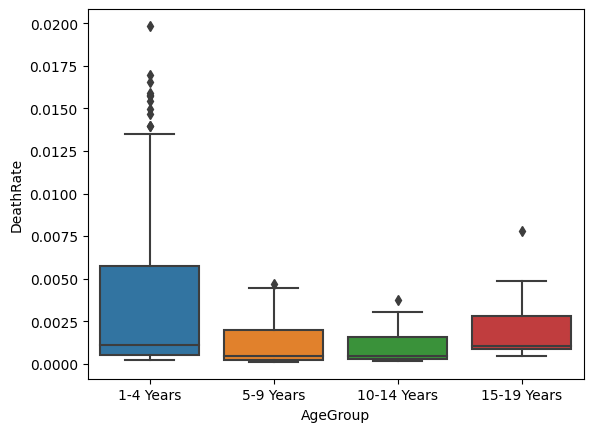

In [91]:
sns.boxplot(data=mortality_data, 
             y='DeathRate', x='AgeGroup')

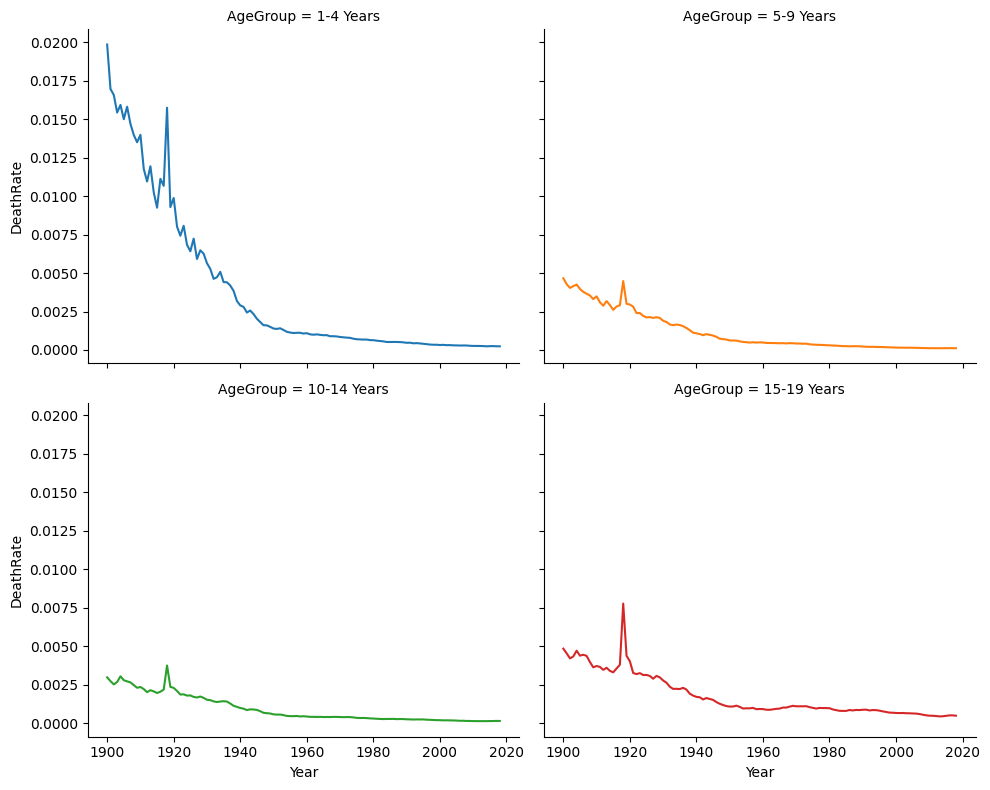

In [92]:
sns.relplot(data=mortality_data, 
            kind='line', x='Year', y='DeathRate', hue='AgeGroup', 
            height=4, aspect=1.25, 
            col='AgeGroup', col_wrap=2, legend=False)